# **HỆ THỐNG GỢI Ý PHIM**

# **Giai đoạn 3: Phân tích khám phá dữ liệu**

# **3.0. Dowload dữ liệu**

In [1]:
!wget https://media.githubusercontent.com/media/HoangNguyen31/Movie-Recommender-System/main/data/TMDB_movie_dataset.csv

--2024-03-07 18:37:00--  https://media.githubusercontent.com/media/HoangNguyen31/Movie-Recommender-System/main/data/TMDB_movie_dataset.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460614114 (439M) [text/plain]
Saving to: ‘TMDB_movie_dataset.csv’

TMDB_movie_dataset. 100%[===================>] 439.28M   164MB/s    in 2.7s    

2024-03-07 18:37:13 (164 MB/s) - ‘TMDB_movie_dataset.csv’ saved [460614114/460614114]



# **3.1. Import thư viện**

In [2]:
# Thư viện xử lý dữ liệu
import numpy as np
import pandas as pd

from wordcloud import WordCloud

import re
import time
from datetime import datetime

# Thư viện trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns

# Bỏ qua các warnings
import warnings
warnings.filterwarnings("ignore")

# **3.2. Đọc dữ liệu**

In [3]:
df = pd.read_csv("TMDB_movie_dataset.csv")
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


# **3.3. Phân tích dữ liệu đơn biến**

In [4]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages'],
      dtype='object')

In [5]:
release_date = pd.to_datetime(df["release_date"])
release_year = release_date.dt.year.value_counts()
release_month = release_date.dt.month.value_counts()
release_day = release_date.dt.day.value_counts()
release_quarter = release_date.dt.quarter.value_counts()
release_dayofweek = release_date.dt.dayofweek.value_counts()

## **Biểu đồ thể hiện số lượng bộ phim có tiêu đề**

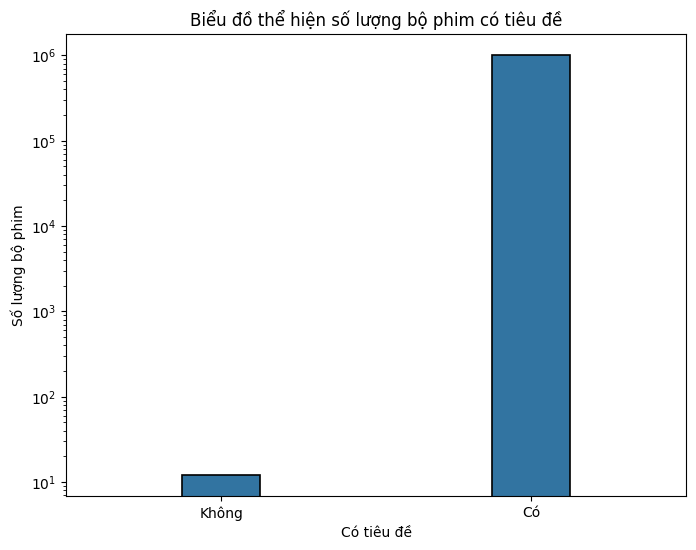

In [6]:
title = df["title"].notnull().astype(int).value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=title.index, y=title.values, edgecolor="black", width=0.25, linewidth=1.2)
plt.title("Biểu đồ thể hiện số lượng bộ phim có tiêu đề")
plt.xlabel("Có tiêu đề")
plt.xticks(ticks=range(len(title)), labels=["Không", "Có"])
plt.ylabel("Số lượng bộ phim")
plt.yscale("log")
plt.show()

## **Biểu đồ thể hiện tình trạng của các bộ phim**

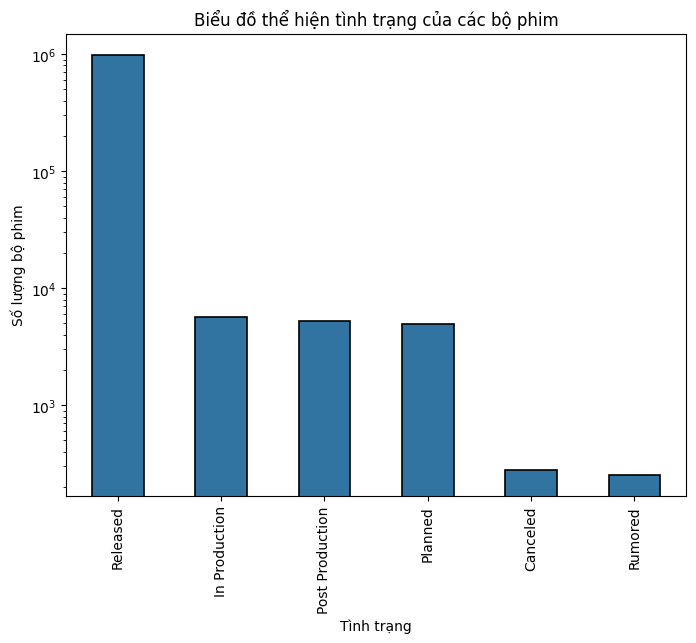

In [7]:
status = df["status"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=status.index, y=status.values, edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện tình trạng của các bộ phim")
plt.xlabel("Tình trạng")
plt.xticks(rotation=90)
plt.ylabel("Số lượng bộ phim")
plt.yscale("log")
plt.show()

## **Biểu đồ thể hiện số lượng phim dành cho người lớn**

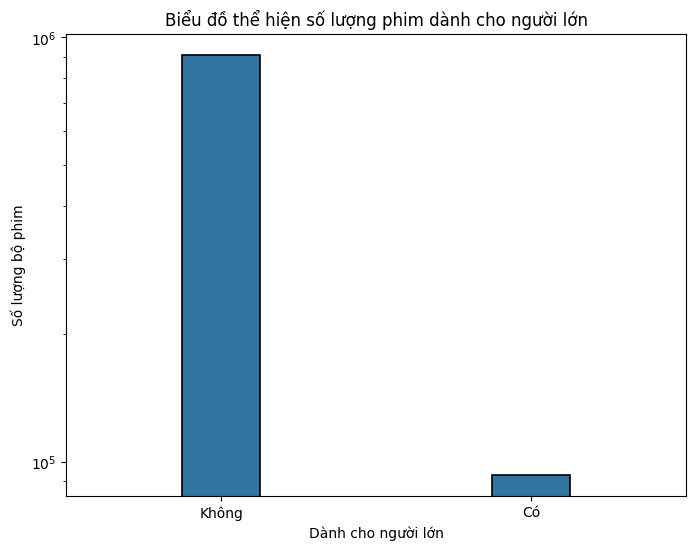

In [8]:
adult = df["adult"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=adult.index, y=adult.values, edgecolor="black", width=0.25, linewidth=1.2)
plt.title("Biểu đồ thể hiện số lượng phim dành cho người lớn")
plt.xlabel("Dành cho người lớn")
plt.xticks(ticks=range(len(title)), labels=["Không", "Có"])
plt.ylabel("Số lượng bộ phim")
plt.yscale("log")
plt.show()

## **Biểu đồ thể hiện số lượng bộ phim có đường dẫn đến hình nền của bộ phim**

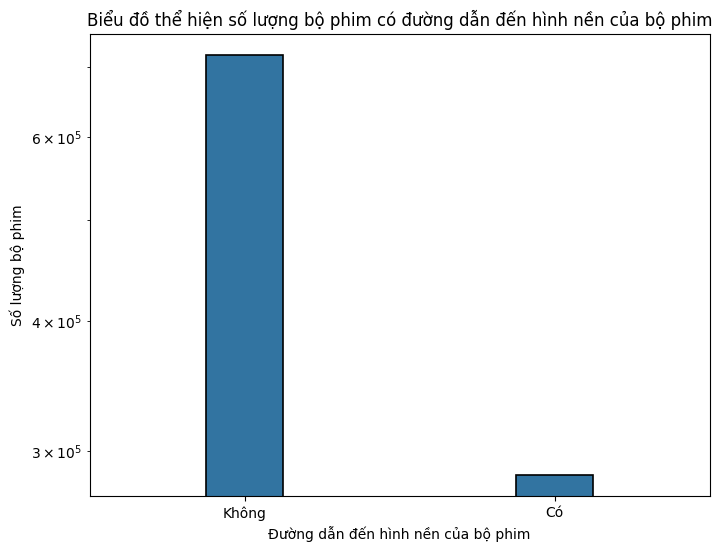

In [9]:
backdrop_path = df["backdrop_path"].notnull().astype(int).value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=backdrop_path.index, y=backdrop_path.values, edgecolor="black", width=0.25, linewidth=1.2)
plt.title("Biểu đồ thể hiện số lượng bộ phim có đường dẫn đến hình nền của bộ phim")
plt.xlabel("Đường dẫn đến hình nền của bộ phim")
plt.xticks(ticks=range(len(backdrop_path)), labels=["Không", "Có"])
plt.ylabel("Số lượng bộ phim")
plt.yscale("log")
plt.show()

## **Biểu đồ thể hiện số lượng bộ phim có trang chủ riêng**

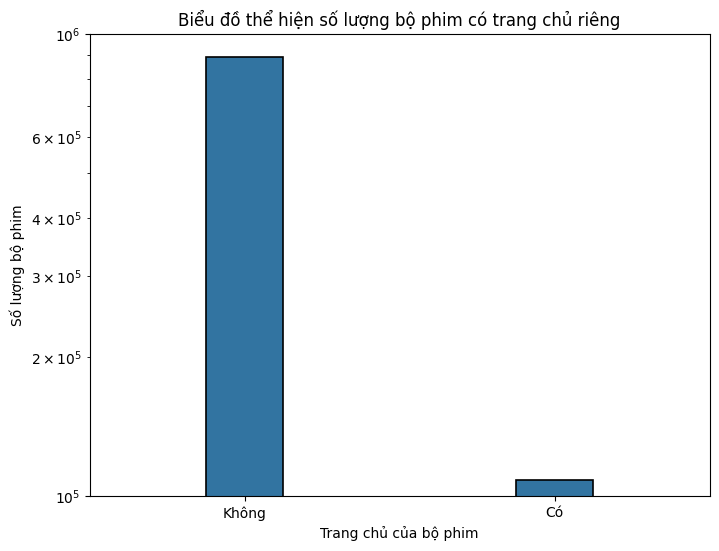

In [10]:
homepage = df["homepage"].notnull().astype(int).value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=homepage.index, y=homepage.values, edgecolor="black", width=0.25, linewidth=1.2)
plt.title("Biểu đồ thể hiện số lượng bộ phim có trang chủ riêng")
plt.xlabel("Trang chủ của bộ phim")
plt.xticks(ticks=range(len(homepage)), labels=["Không", "Có"])
plt.ylabel("Số lượng bộ phim")
plt.yscale("log")
plt.ylim(1e5, 10e5)
plt.show()

## **Biểu đồ thể hiện top 10 ngôn ngữ gốc của bộ phim**

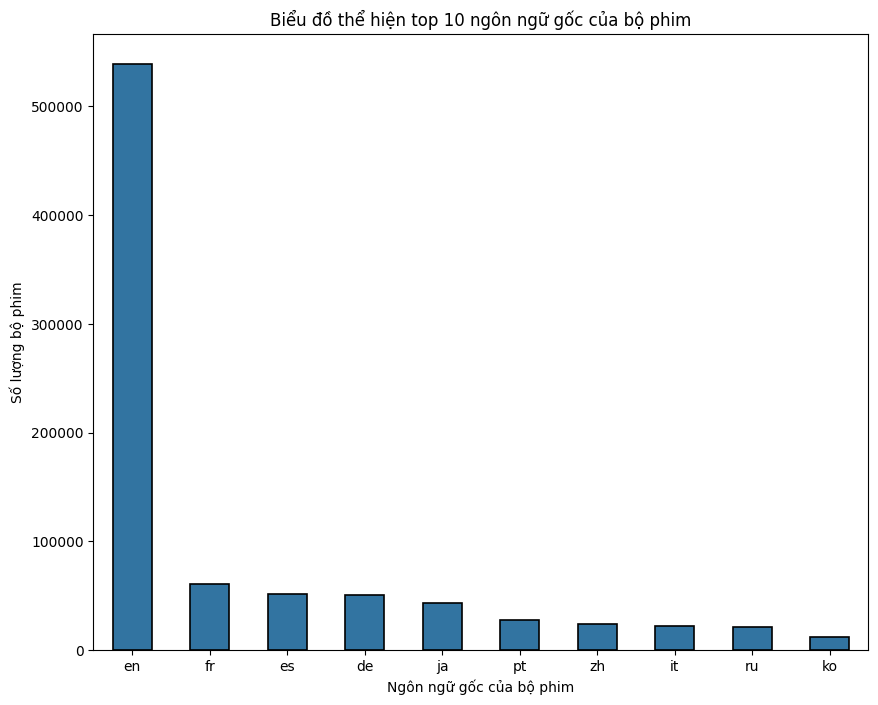

In [11]:
original_language = df["original_language"].value_counts()[:10]
plt.figure(figsize=(10, 8))
sns.barplot(x=original_language.index, y=original_language.values, edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện top 10 ngôn ngữ gốc của bộ phim")
plt.xlabel("Ngôn ngữ gốc của bộ phim")
plt.ylabel("Số lượng bộ phim")
plt.show()

## **Biểu đồ thể hiện số lượng bộ phim có tiêu đề gốc**

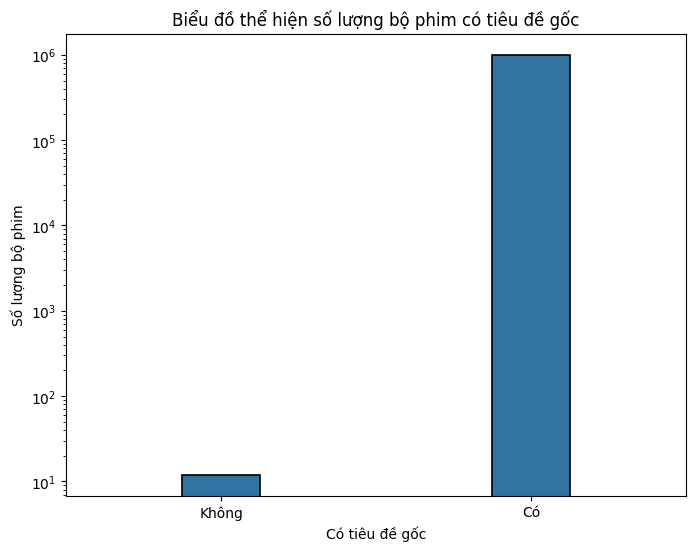

In [12]:
original_title = df["original_title"].notnull().astype(int).value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=original_title.index, y=original_title.values, edgecolor="black", width=0.25, linewidth=1.2)
plt.title("Biểu đồ thể hiện số lượng bộ phim có tiêu đề gốc")
plt.xlabel("Có tiêu đề gốc")
plt.xticks(ticks=range(len(original_title)), labels=["Không", "Có"])
plt.ylabel("Số lượng bộ phim")
plt.yscale("log")
plt.show()

## **Biểu đồ thể hiện số lượng bộ phim có đường dẫn đến poster của bộ phim**

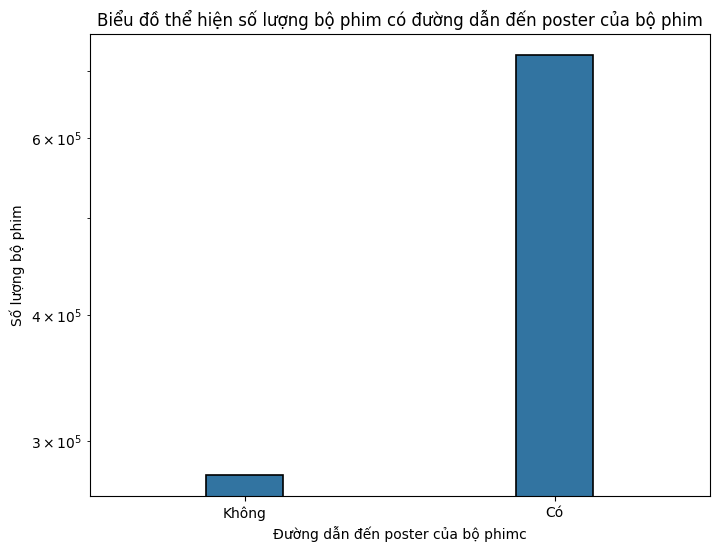

In [13]:
poster_path = df["poster_path"].notnull().astype(int).value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=poster_path.index, y=poster_path.values, edgecolor="black", width=0.25, linewidth=1.2)
plt.title("Biểu đồ thể hiện số lượng bộ phim có đường dẫn đến poster của bộ phim")
plt.xlabel("Đường dẫn đến poster của bộ phimc")
plt.xticks(ticks=range(len(poster_path)), labels=["Không", "Có"])
plt.ylabel("Số lượng bộ phim")
plt.yscale("log")
plt.show()

## **Những từ xuất hiện trong tóm tắt phim nhiều nhất**

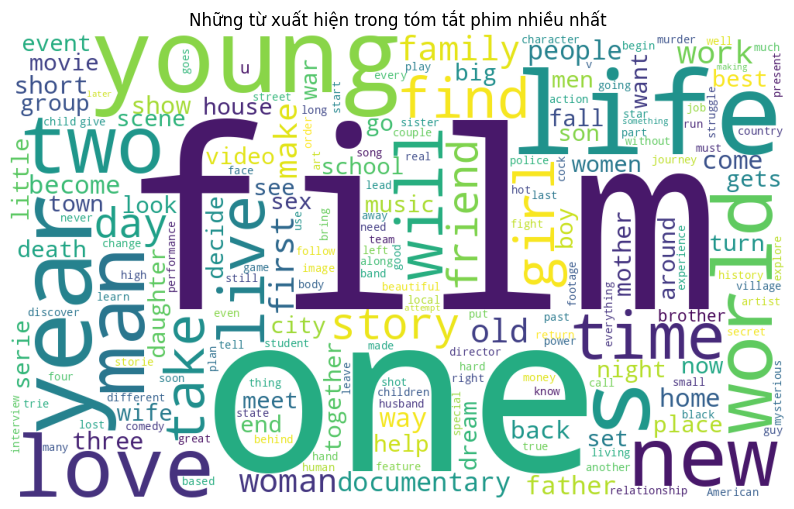

In [14]:
overview = " ".join(df["overview"].apply(lambda x: x if x is not np.nan else ""))

plt.figure(figsize = (10, 8))
wordcloud = WordCloud(max_font_size=None, collocations=False,
                      background_color="white", width=1000, height=600).generate(overview)
plt.imshow(wordcloud)
plt.title("Những từ xuất hiện trong tóm tắt phim nhiều nhất")
plt.axis("off")
plt.show()

## **Những từ xuất hiện trong khẩu hiệu phim nhiều nhất**

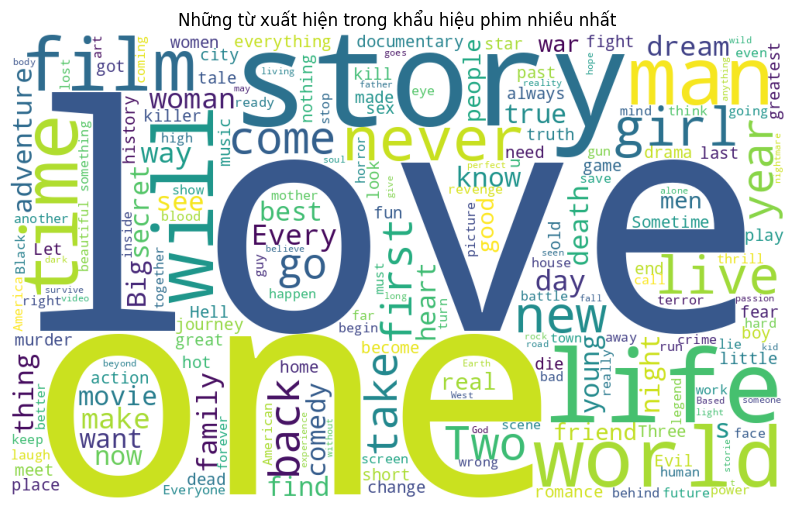

In [15]:
tagline = " ".join(df["tagline"].apply(lambda x: x if x is not np.nan else ""))

plt.figure(figsize = (10, 8))
wordcloud = WordCloud(max_font_size=None, collocations=False,
                      background_color="white", width=1000, height=600).generate(tagline)
plt.imshow(wordcloud)
plt.title("Những từ xuất hiện trong khẩu hiệu phim nhiều nhất")
plt.axis("off")
plt.show()

## **Biểu đồ thể hiện top thể loại phim được sản xuất nhiêu nhất**

In [16]:
genres = df["genres"].apply(lambda x: re.split(", |,", str(x)))
genres = genres.apply(lambda x: [] if str(x) == "['nan']" else x)
genres = genres.explode("genres")
genres = genres.value_counts()

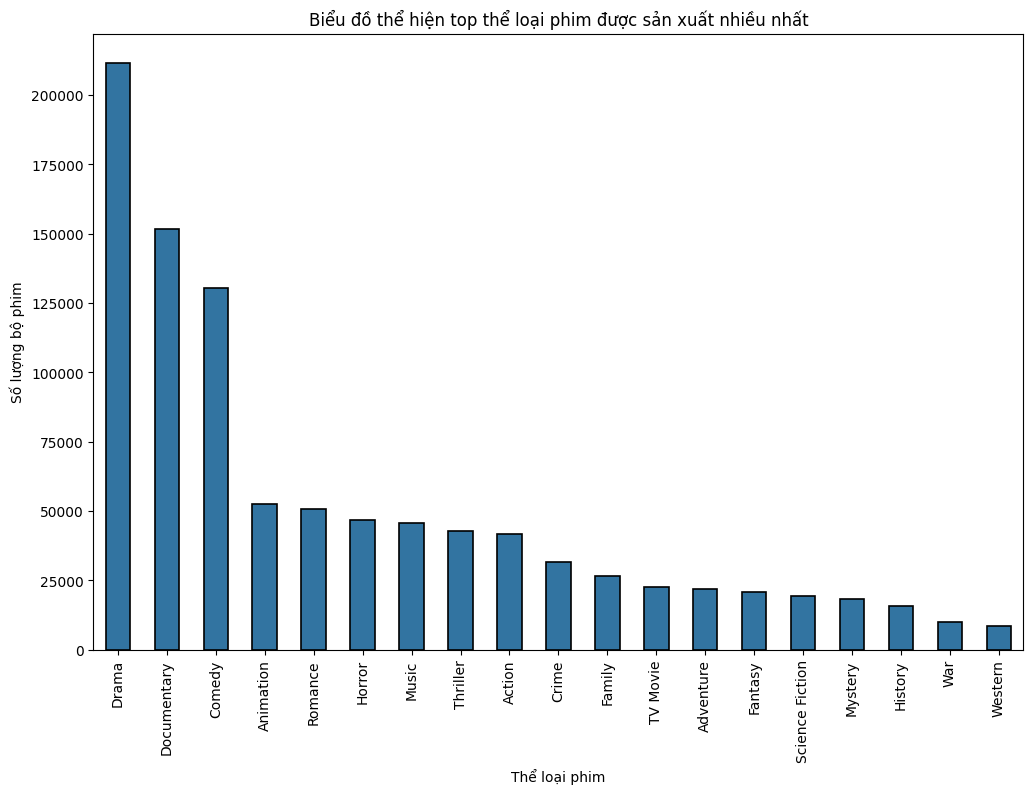

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(x=genres.index, y=genres.values, edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện top thể loại phim được sản xuất nhiều nhất")
plt.xlabel("Thể loại phim")
plt.xticks(rotation=90)
plt.ylabel("Số lượng bộ phim")
plt.show()

## **Biểu đồ thể hiện top 10 công ty sản xuất phim nhiều nhất**

In [18]:
production_companies = df["production_companies"].apply(lambda x: re.split(", |,", str(x)))
production_companies = production_companies.apply(lambda x: [] if str(x) == "['nan']" else x)
production_companies = production_companies.explode("production_companies")
production_companies = production_companies.value_counts()[:10]

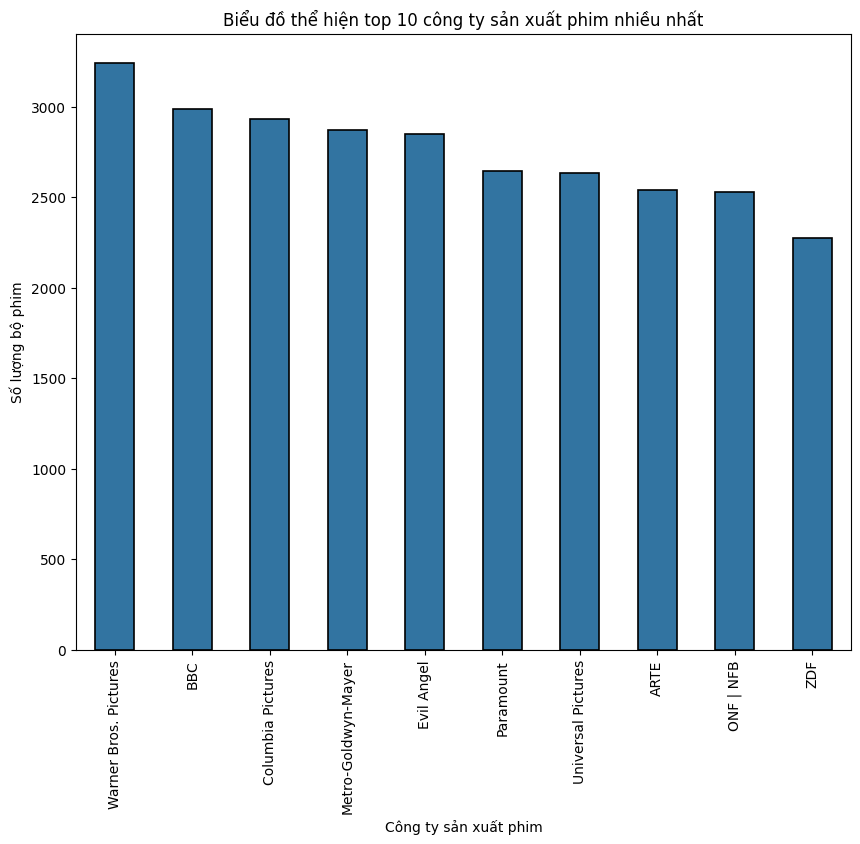

In [19]:
plt.figure(figsize=(10, 8))
sns.barplot(x=production_companies.index, y=production_companies.values, edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện top 10 công ty sản xuất phim nhiều nhất")
plt.xlabel("Công ty sản xuất phim")
plt.xticks(rotation=90)
plt.ylabel("Số lượng bộ phim")
plt.show()

## **Biểu đồ thể hiện top 10 đất nước sản xuất phim nhiều nhất**

In [20]:
production_countries = df["production_countries"].apply(lambda x: re.split(", |,", str(x)))
production_countries = production_countries.apply(lambda x: [] if str(x) == "['nan']" else x)
production_countries = production_countries.explode("production_countries")
production_countries = production_countries.value_counts()[:10]

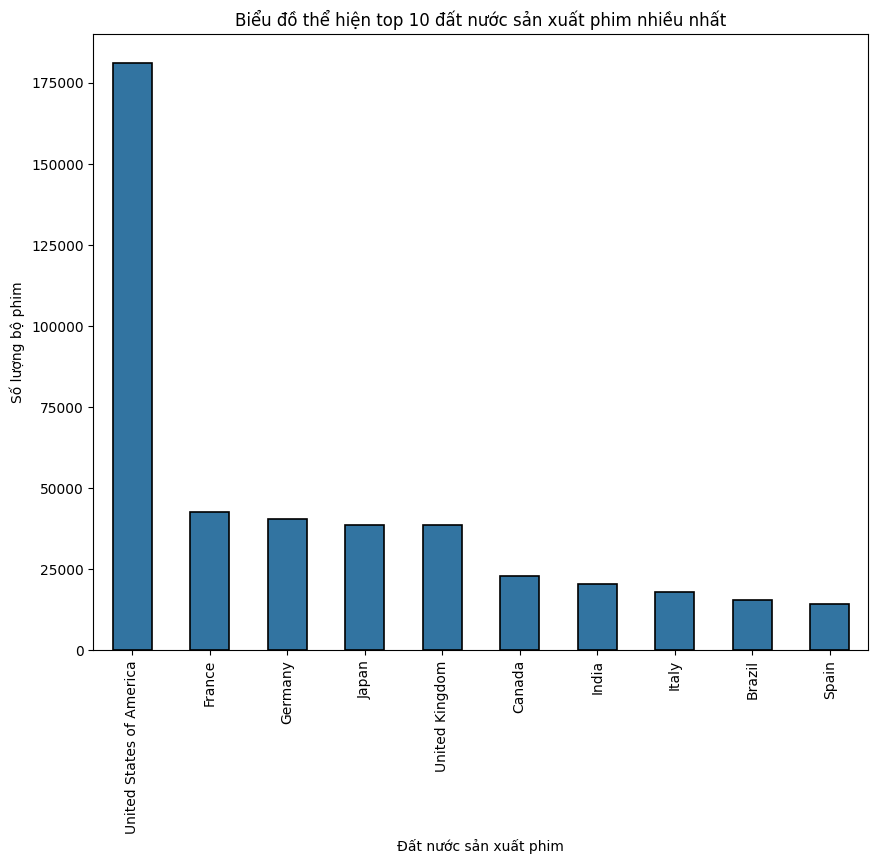

In [21]:
plt.figure(figsize=(10, 8))
sns.barplot(x=production_countries.index, y=production_countries.values, edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện top 10 đất nước sản xuất phim nhiều nhất")
plt.xlabel("Đất nước sản xuất phim")
plt.xticks(rotation=90)
plt.ylabel("Số lượng bộ phim")
plt.show()

## **Biểu đồ thể hiện top 10 ngôn ngữ được nói trong phim nhiều nhất**

In [22]:
spoken_languages = df["spoken_languages"].apply(lambda x: re.split(", |,", str(x)))
spoken_languages = spoken_languages.apply(lambda x: [] if str(x) == "['nan']" else x)
spoken_languages = spoken_languages.explode("spoken_languages")
spoken_languages = spoken_languages.value_counts().drop("No Language")[:10]

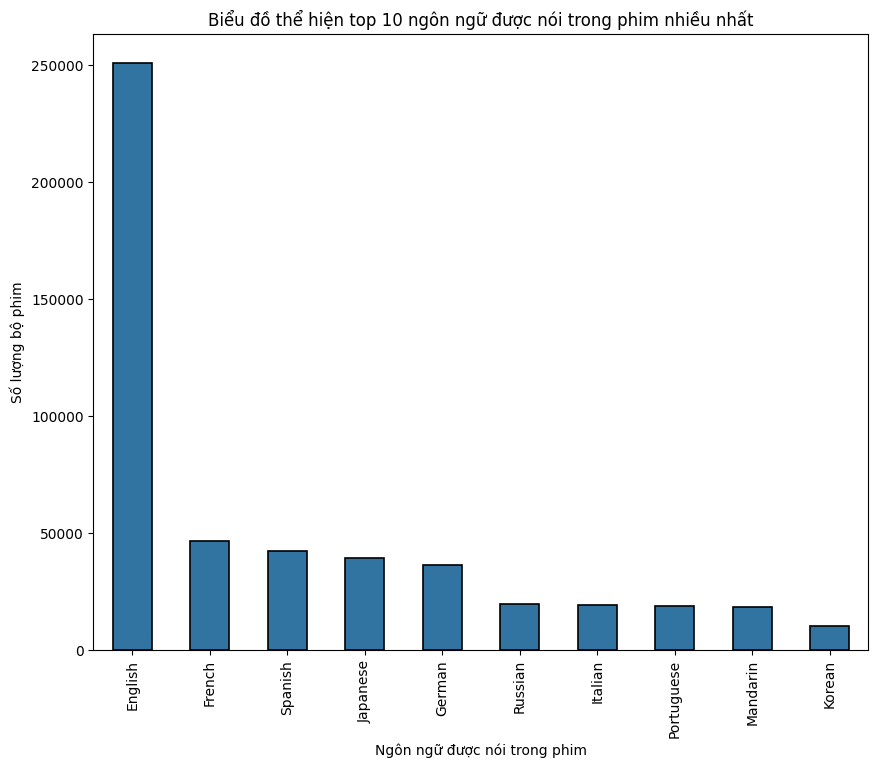

In [23]:
plt.figure(figsize=(10, 8))
sns.barplot(x=spoken_languages.index, y=spoken_languages.values, edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện top 10 ngôn ngữ được nói trong phim nhiều nhất")
plt.xlabel("Ngôn ngữ được nói trong phim")
plt.xticks(rotation=90)
plt.ylabel("Số lượng bộ phim")
plt.show()

## **Biểu đồ thể hiện số lượng phim được ra mắt mỗi năm từ 1950 đến 2024**

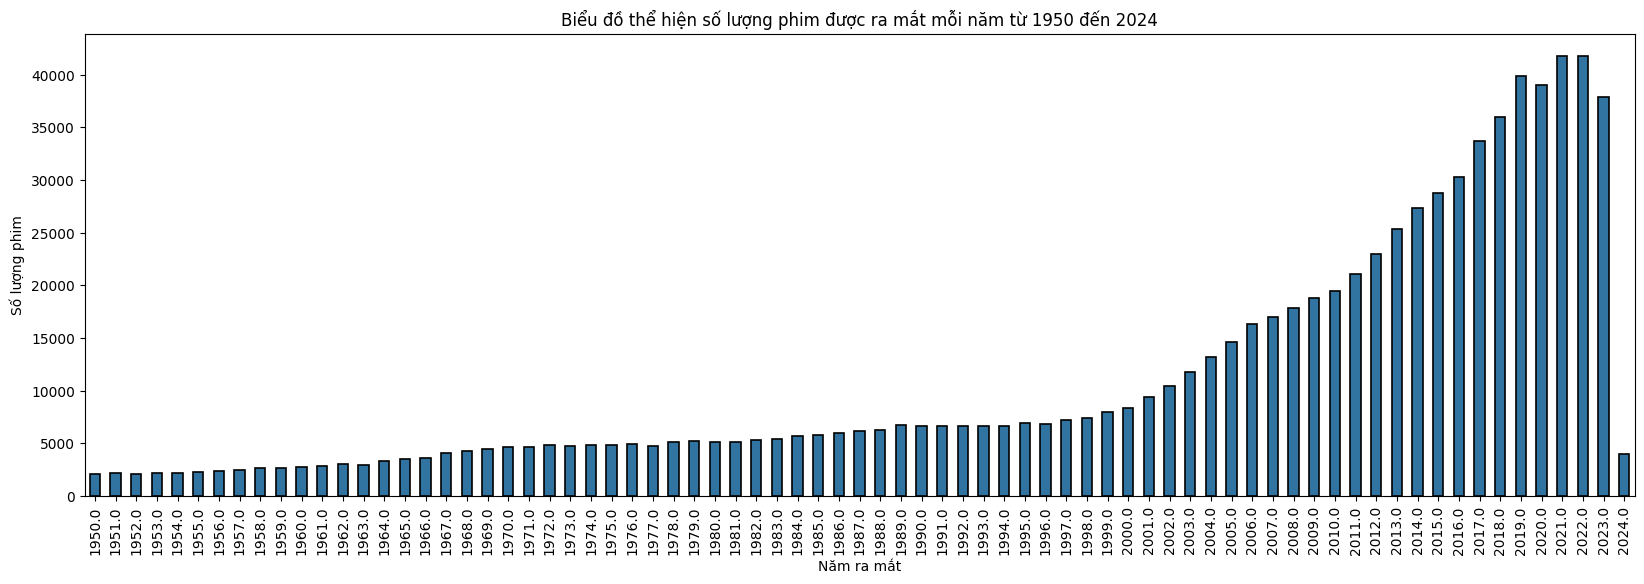

In [24]:
filtered_release_year = release_year[(release_year.index >= 1950) & (release_year.index <= 2024)]
plt.figure(figsize=(20, 6))
sns.barplot(x=filtered_release_year.index, y=filtered_release_year.values,
            edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện số lượng phim được ra mắt mỗi năm từ 1950 đến 2024")
plt.xticks(ticks=range(len(filtered_release_year)), rotation=90)
plt.xlabel("Năm ra mắt")
plt.ylabel("Số lượng phim")
plt.show()

## **Biểu đồ thể hiện số lượng phim được ra mắt trong mỗi tháng**

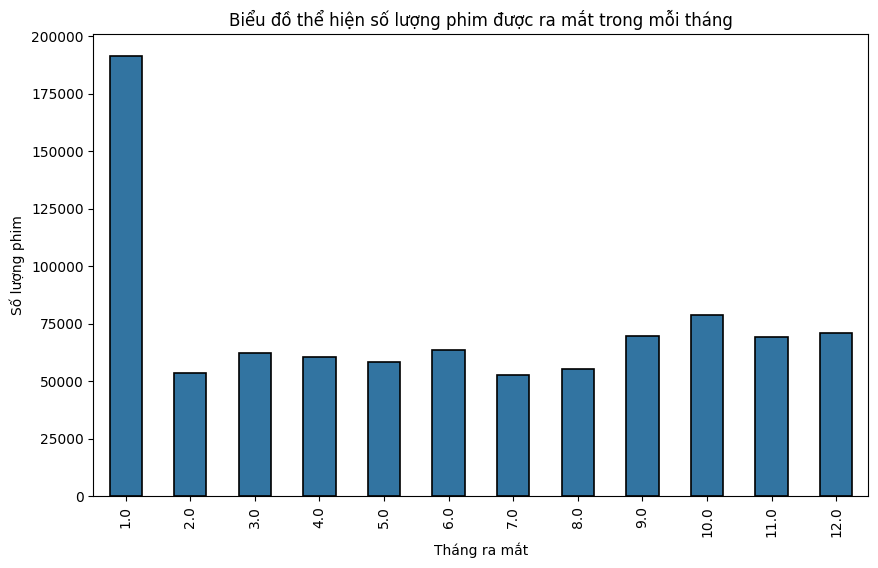

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=release_month.index, y=release_month.values,
            edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện số lượng phim được ra mắt trong mỗi tháng")
plt.xticks(ticks=range(len(release_month)), rotation=90)
plt.xlabel("Tháng ra mắt")
plt.ylabel("Số lượng phim")
plt.show()

## **Biểu đồ thể hiện số lượng phim được ra mắt mỗi ngày trong tháng**

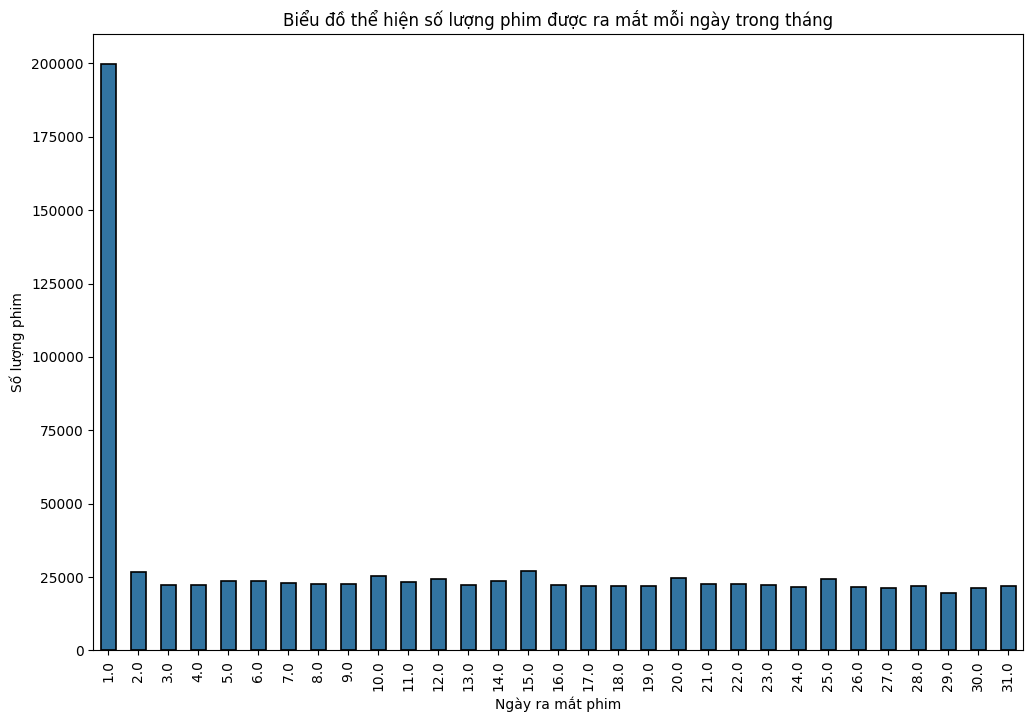

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(x=release_day.index, y=release_day.values,
            edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện số lượng phim được ra mắt mỗi ngày trong tháng")
plt.xticks(ticks=range(len(release_day)), rotation=90)
plt.xlabel("Ngày ra mắt phim")
plt.ylabel("Số lượng phim")
plt.show()

## **Biểu đồ thể hiện số lượng phim được ra mắt trong mỗi quý**

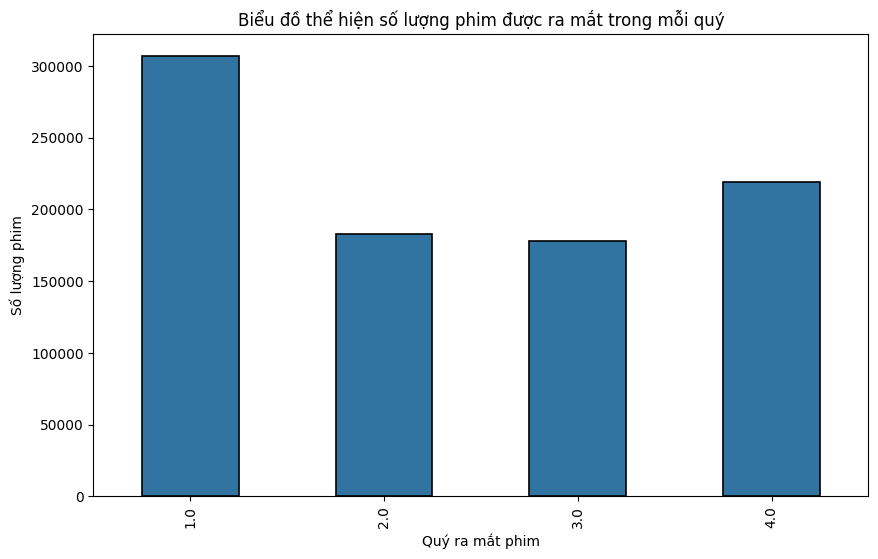

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=release_quarter.index, y=release_quarter.values,
            edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện số lượng phim được ra mắt trong mỗi quý")
plt.xticks(ticks=range(len(release_quarter)), rotation=90)
plt.xlabel("Quý ra mắt phim")
plt.ylabel("Số lượng phim")
plt.show()

## **Biểu đồ thể hiện số lượng phim được ra mắt mỗi ngày trong tuần**

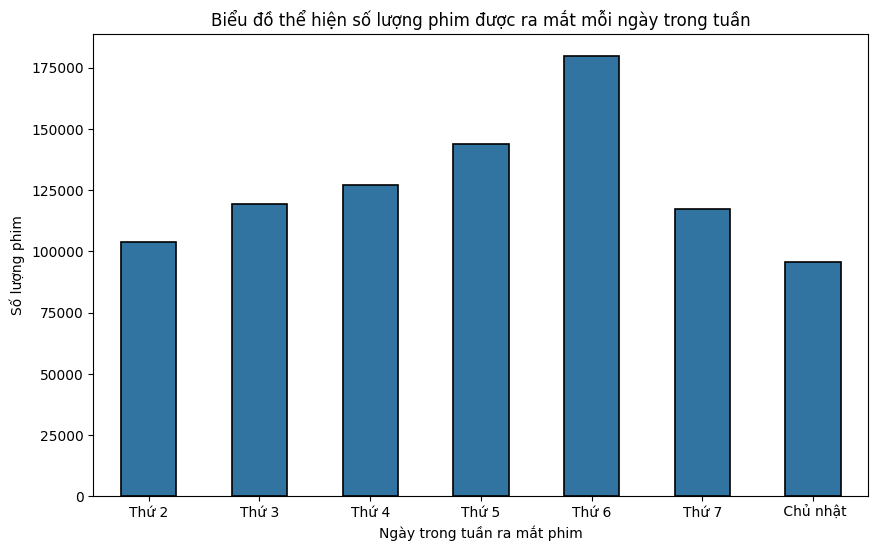

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x=release_dayofweek.index, y=release_dayofweek.values,
            edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện số lượng phim được ra mắt mỗi ngày trong tuần")
labels_release_dayofweek = ["Thứ 2", "Thứ 3", "Thứ 4", "Thứ 5",
                            "Thứ 6", "Thứ 7", " Chủ nhật"]
plt.xticks(ticks=range(len(release_dayofweek)), labels=labels_release_dayofweek)
plt.xlabel("Ngày trong tuần ra mắt phim")
plt.ylabel("Số lượng phim")
plt.show()

## **Biểu đồ thể hiện phân phối điểm đánh giá trung bình của bộ phim**

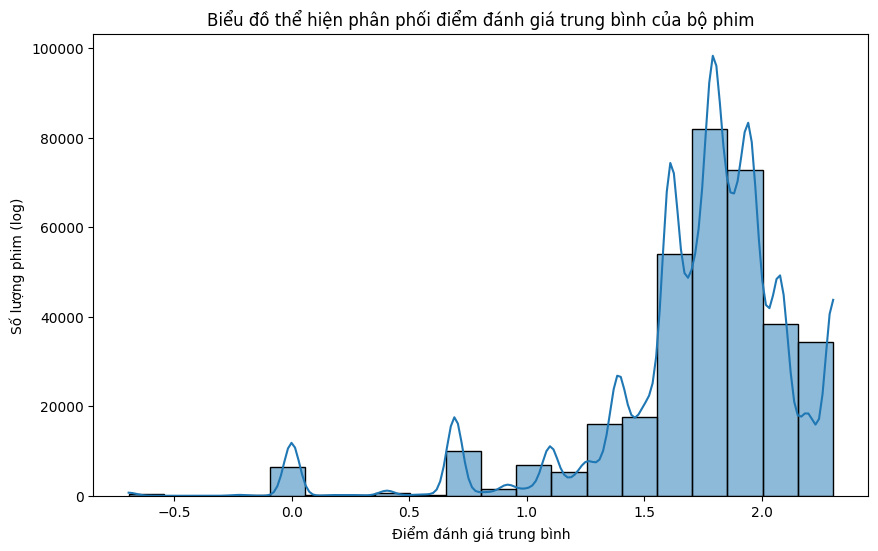

In [29]:
vote_average = np.log(df.loc[df["vote_average"] > 0]["vote_average"])

plt.figure(figsize=(10, 6))
sns.histplot(data=vote_average, kde=True, bins=20, color="tab:blue")
plt.title("Biểu đồ thể hiện phân phối điểm đánh giá trung bình của bộ phim")
plt.xlabel("Điểm đánh giá trung bình")
plt.ylabel("Số lượng phim (log)")
plt.show()

## **Biểu đồ thể hiện phân phối số lượng phiếu bình chọn của bộ phim**

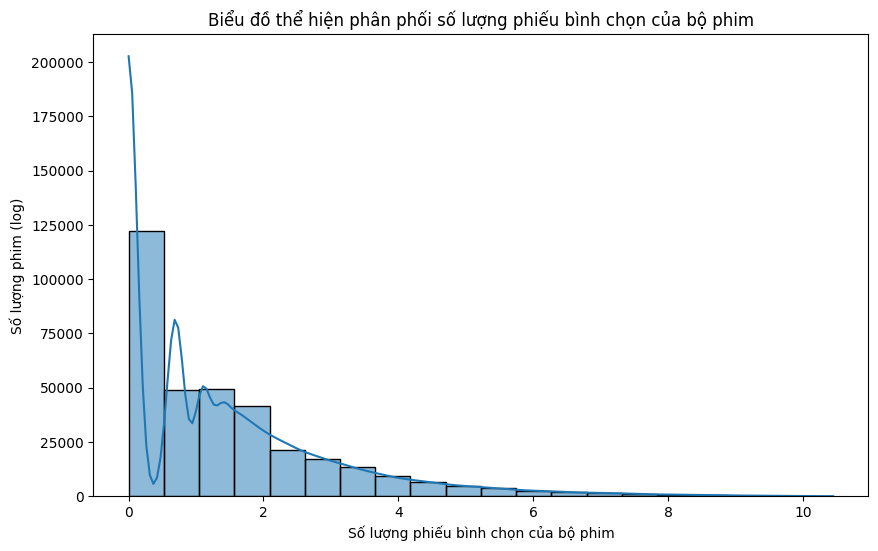

In [30]:
vote_count = np.log(df.loc[df["vote_count"] > 0]["vote_count"])

plt.figure(figsize=(10, 6))
sns.histplot(data=vote_count, kde=True, bins=20, color="tab:blue")
plt.title("Biểu đồ thể hiện phân phối số lượng phiếu bình chọn của bộ phim")
plt.xlabel("Số lượng phiếu bình chọn của bộ phim")
plt.ylabel("Số lượng phim (log)")
plt.show()

## **Biểu đồ thể hiện phân phối doanh thu của bộ phim**

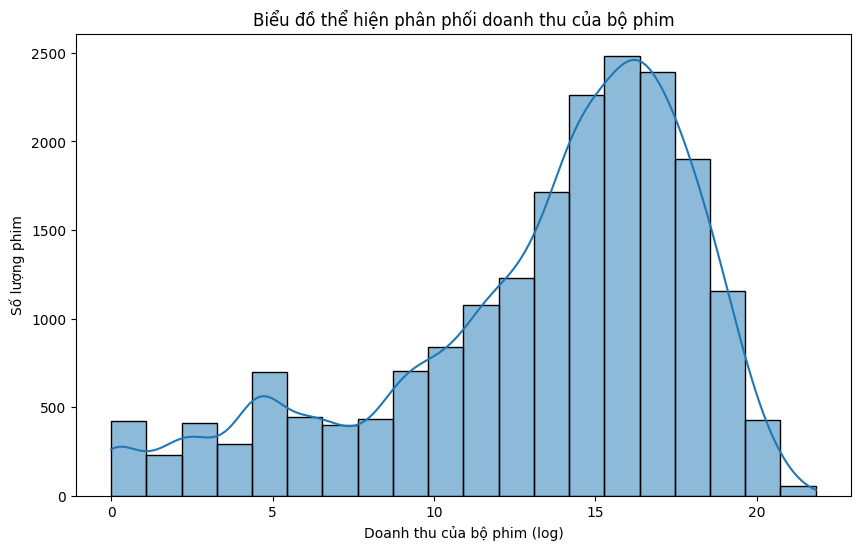

In [31]:
revenue = np.log(df.loc[df["revenue"] > 0]["revenue"])

plt.figure(figsize=(10, 6))
sns.histplot(data=revenue, kde=True, bins=20, color="tab:blue")
plt.title("Biểu đồ thể hiện phân phối doanh thu của bộ phim")
plt.xlabel("Doanh thu của bộ phim (log)")
plt.ylabel("Số lượng phim")
plt.show()

## **Biểu đồ thể hiện phân phối thời lượng của bộ phim**

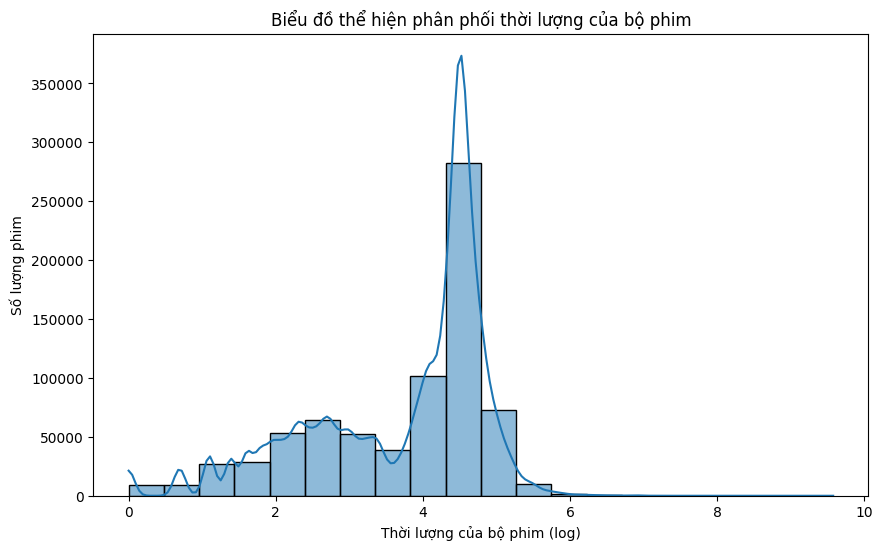

In [32]:
runtime = np.log(df.loc[df["runtime"] > 0]["runtime"])

plt.figure(figsize=(10, 6))
sns.histplot(data=runtime, kde=True, bins=20, color="tab:blue")
plt.title("Biểu đồ thể hiện phân phối thời lượng của bộ phim")
plt.xlabel("Thời lượng của bộ phim (log)")
plt.ylabel("Số lượng phim")
plt.show()

## **Biểu đồ thể hiện phân phối kinh phí sản xuất của bộ phim**

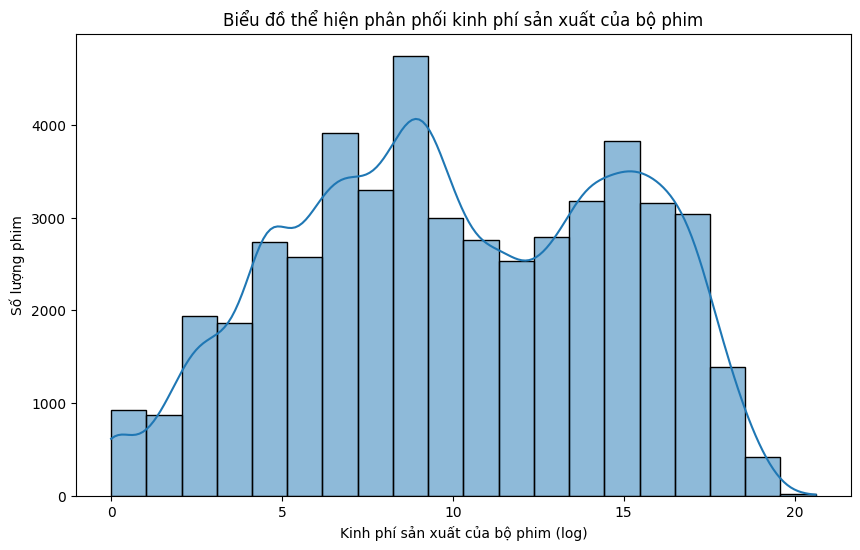

In [33]:
budget = np.log(df.loc[df["budget"] > 0]["budget"])

plt.figure(figsize=(10, 6))
sns.histplot(data=budget, kde=True, bins=20, color="tab:blue")
plt.title("Biểu đồ thể hiện phân phối kinh phí sản xuất của bộ phim")
plt.xlabel("Kinh phí sản xuất của bộ phim (log)")
plt.ylabel("Số lượng phim")
plt.show()

## **Biểu đồ thể hiện phân phối độ phổ biến của bộ phim**

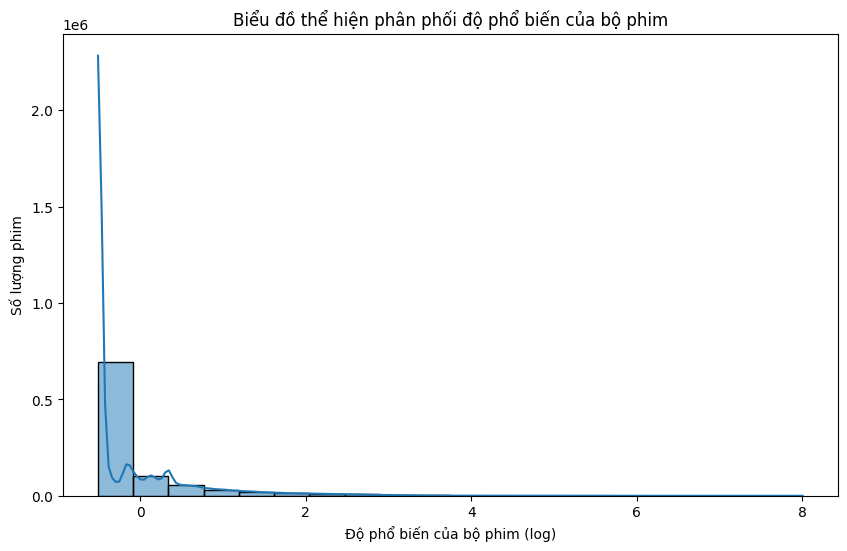

In [34]:
popularity = np.log(df.loc[df["popularity"] > 0]["popularity"])

plt.figure(figsize=(10, 6))
sns.histplot(data=popularity, kde=True, bins=20, color="tab:blue")
plt.title("Biểu đồ thể hiện phân phối độ phổ biến của bộ phim")
plt.xlabel("Độ phổ biến của bộ phim (log)")
plt.ylabel("Số lượng phim")
plt.show()

# **3.4. Phân tích dữ liệu hai biến**

In [35]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages'],
      dtype='object')

## **Biểu đồ thể hiện tổng doanh thu của phim qua các năm từ 1950 đến 2024**

In [36]:
revenue_by_year = pd.DataFrame({"release_year": release_date.dt.year, "revenue": df["revenue"]})
revenue_by_year = revenue_by_year.loc[(revenue_by_year["release_year"] >= 1950) &
                                      (revenue_by_year["release_year"] <= 2024) &
                                      (revenue_by_year["revenue"] > 0)]
revenue_by_year = revenue_by_year.groupby("release_year")["revenue"].sum().reset_index()

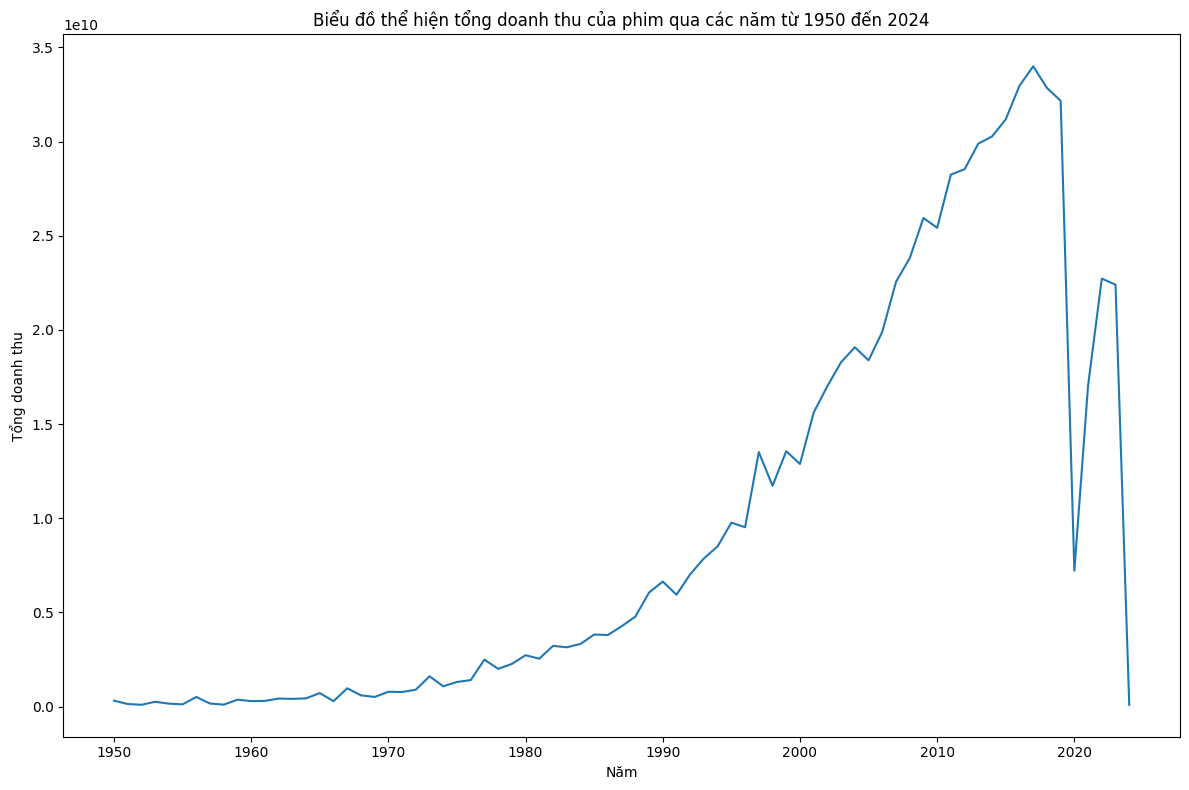

In [37]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=revenue_by_year, x="release_year", y="revenue")
plt.title("Biểu đồ thể hiện tổng doanh thu của phim qua các năm từ 1950 đến 2024")
plt.xlabel("Năm")
plt.ylabel("Tổng doanh thu")
plt.tight_layout()
plt.show()

## **Biểu đồ thể hiện top 10 thể loại phim được đánh giá cao nhất**

In [38]:
genres = df["genres"].apply(lambda x: re.split(", |,", str(x)))
genres = genres.apply(lambda x: [] if str(x) == "['nan']" else x)
vote_average_by_genres_df = pd.DataFrame({"genres": genres, "vote_average": df["vote_average"]})
vote_average_by_genres_df = vote_average_by_genres_df.explode("genres")
vote_average_by_genres_df = vote_average_by_genres_df.loc[(vote_average_by_genres_df["genres"].isnull() == False) &
                                                          (vote_average_by_genres_df["vote_average"] > 0)]
vote_average_by_genres = vote_average_by_genres_df.groupby("genres")["vote_average"].mean().reset_index()
vote_average_by_genres = vote_average_by_genres.sort_values(by="vote_average", ascending=False)

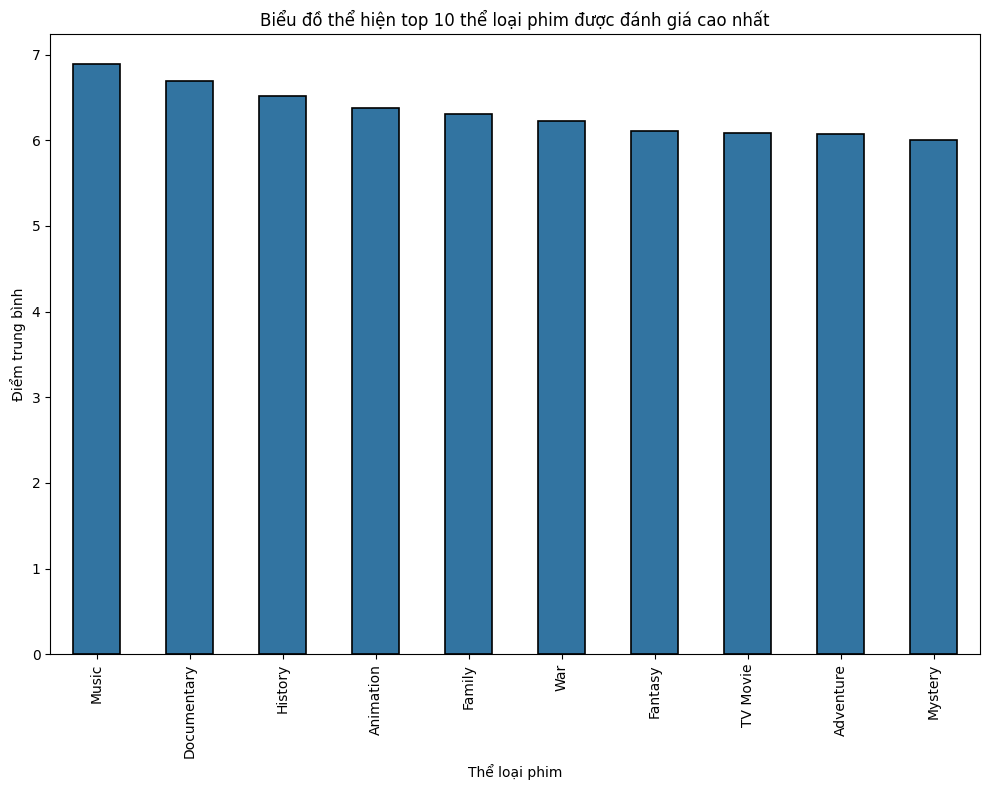

In [39]:
plt.figure(figsize=(10, 8))
sns.barplot(data=vote_average_by_genres[:10], x="genres", y="vote_average", edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện top 10 thể loại phim được đánh giá cao nhất")
plt.xlabel("Thể loại phim")
plt.ylabel("Điểm trung bình")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## **Biểu đồ thể hiện top 10 thể loại phim mang lại doanh thu trung bình cao nhất**

In [40]:
genres = df["genres"].apply(lambda x: re.split(", |,", str(x)))
genres = genres.apply(lambda x: [] if str(x) == "['nan']" else x)
revenue_by_genres_df = pd.DataFrame({"genres": genres, "revenue": df["revenue"]})
revenue_by_genres_df = revenue_by_genres_df.explode("genres")
revenue_by_genres_df = revenue_by_genres_df.loc[(revenue_by_genres_df["genres"].isnull() == False) &
                                                (revenue_by_genres_df["revenue"] > 0)]
revenue_by_genres = revenue_by_genres_df.groupby("genres")["revenue"].mean().reset_index()
revenue_by_genres = revenue_by_genres.sort_values(by="revenue", ascending=False)

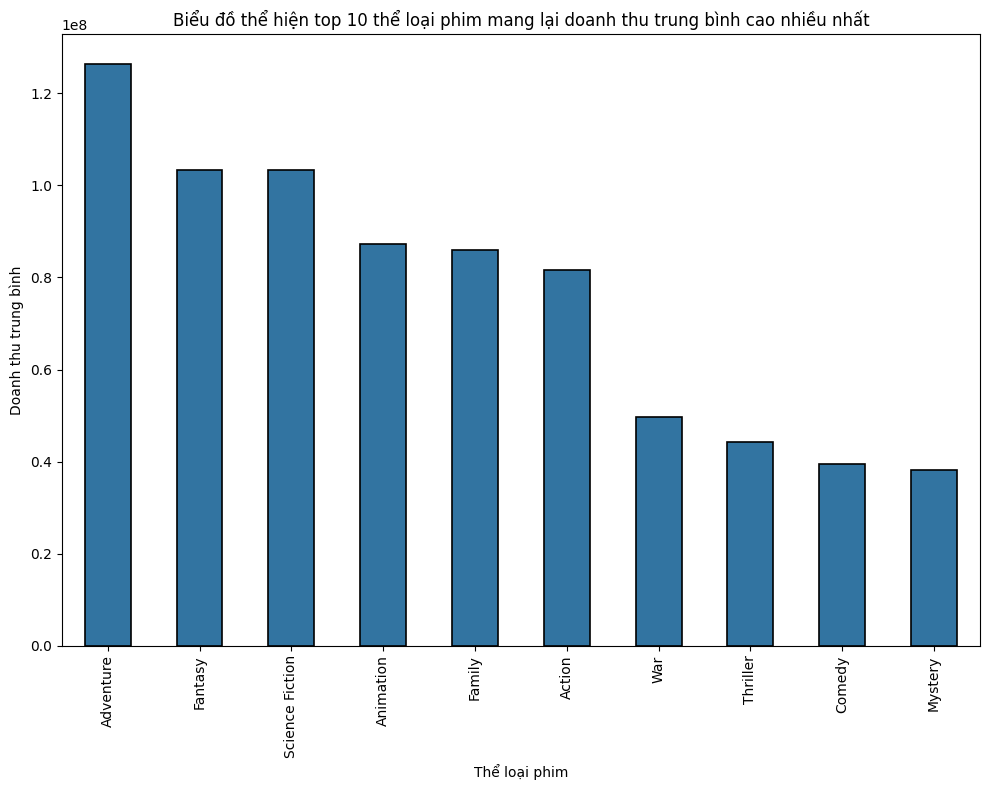

In [41]:
plt.figure(figsize=(10, 8))
sns.barplot(data=revenue_by_genres[:10], x="genres", y="revenue", edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện top 10 thể loại phim mang lại doanh thu trung bình cao nhiều nhất")
plt.xlabel("Thể loại phim")
plt.ylabel("Doanh thu trung bình")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## **Biểu đồ thể hiện mối tương quan giữa điểm đánh giá trung bình và doanh thu của bộ phim**

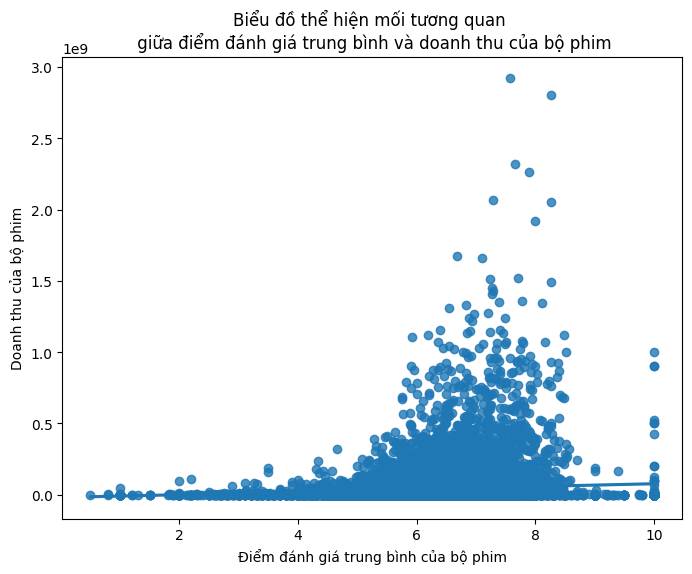

In [42]:
df_filtered = df.loc[(df["vote_average"] > 0) & (df["revenue"] > 0)]

plt.figure(figsize=(8, 6))
sns.regplot(x="vote_average", y="revenue", data=df_filtered)
plt.title("Biểu đồ thể hiện mối tương quan \n giữa điểm đánh giá trung bình và doanh thu của bộ phim")
plt.xlabel("Điểm đánh giá trung bình của bộ phim")
plt.ylabel("Doanh thu của bộ phim")
plt.show()

In [43]:
correlation = df_filtered["revenue"].corr(df_filtered["vote_average"])
correlation

0.099707568417667

## **Biểu đồ thể hiện mối tương quan giữa số lượng phiếu bình chọn và doanh thu của bộ phim**

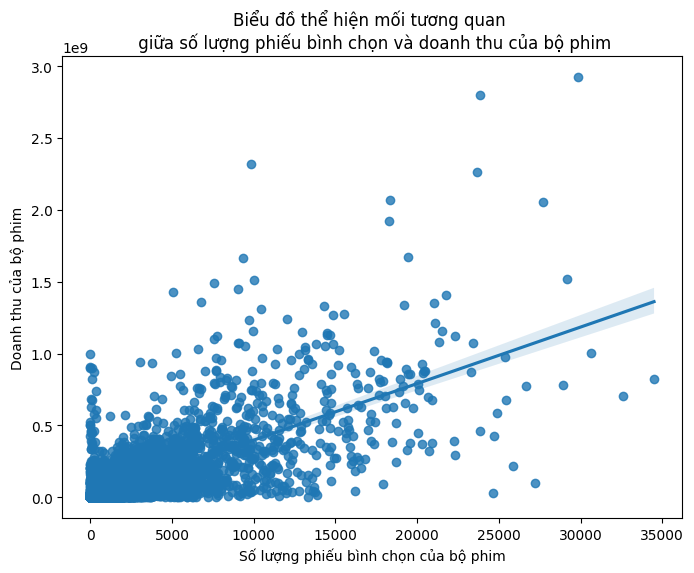

In [44]:
df_filtered = df.loc[(df["vote_count"] > 0) & (df["revenue"] > 0)]

plt.figure(figsize=(8, 6))
sns.regplot(x="vote_count", y="revenue", data=df_filtered)
plt.title("Biểu đồ thể hiện mối tương quan \n giữa số lượng phiếu bình chọn và doanh thu của bộ phim")
plt.xlabel("Số lượng phiếu bình chọn của bộ phim")
plt.ylabel("Doanh thu của bộ phim")
plt.show()

In [45]:
correlation = df_filtered["revenue"].corr(df_filtered["vote_count"])
correlation

0.751837651289215

## **Biểu đồ thể hiện mối tương quan giữa kinh phí sản xuất  và doanh thu của bộ phim**

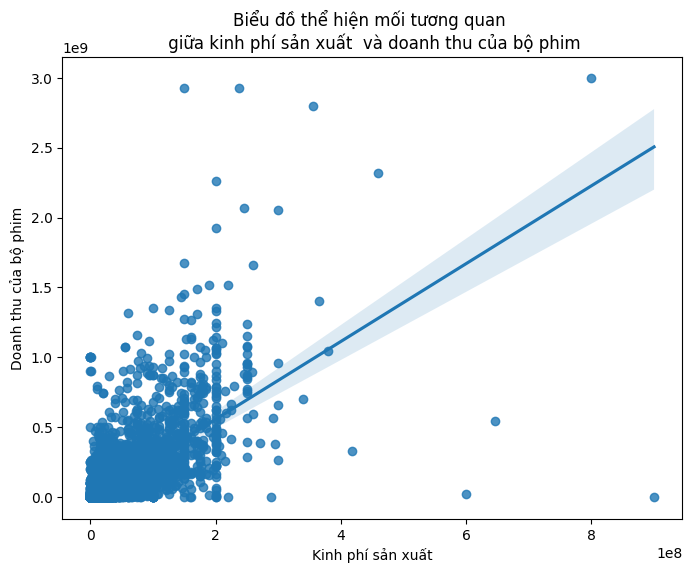

In [46]:
df_filtered = df.loc[(df["budget"] > 0) & (df["revenue"] > 0)]

plt.figure(figsize=(8, 6))
sns.regplot(x="budget", y="revenue", data=df_filtered)
plt.title("Biểu đồ thể hiện mối tương quan \n giữa kinh phí sản xuất  và doanh thu của bộ phim")
plt.xlabel("Kinh phí sản xuất")
plt.ylabel("Doanh thu của bộ phim")
plt.show()

In [47]:
correlation = df_filtered["revenue"].corr(df_filtered["budget"])
correlation

0.7054977961233224

## **Biểu đồ thể hiện mối tương quan giữa thời lượng và doanh thu của bộ phim**

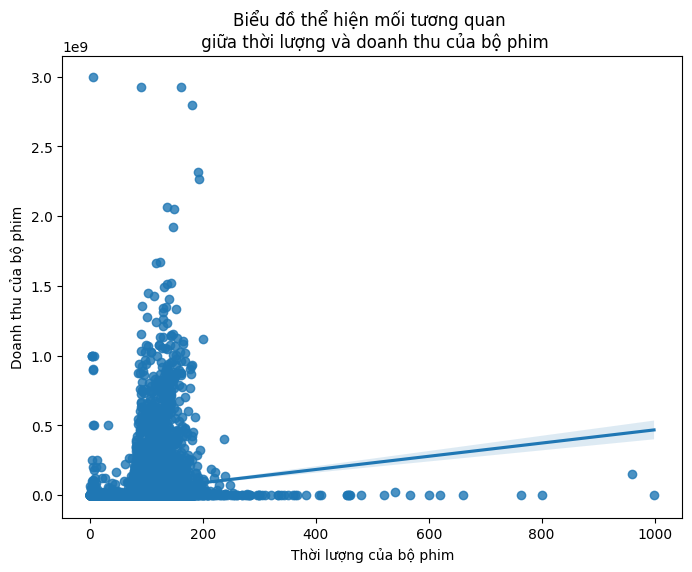

In [48]:
df_filtered = df.loc[(df["runtime"] > 0) & (df["revenue"] > 0)]

plt.figure(figsize=(8, 6))
sns.regplot(x="runtime", y="revenue", data=df_filtered)
plt.title("Biểu đồ thể hiện mối tương quan \n giữa thời lượng và doanh thu của bộ phim")
plt.xlabel("Thời lượng của bộ phim")
plt.ylabel("Doanh thu của bộ phim")
plt.show()

In [49]:
correlation = df_filtered["revenue"].corr(df_filtered["runtime"])
correlation

0.14645096920051945

## **Biểu đồ thể hiện mối tương quan giữa độ phổ biến và doanh thu của bộ phim**

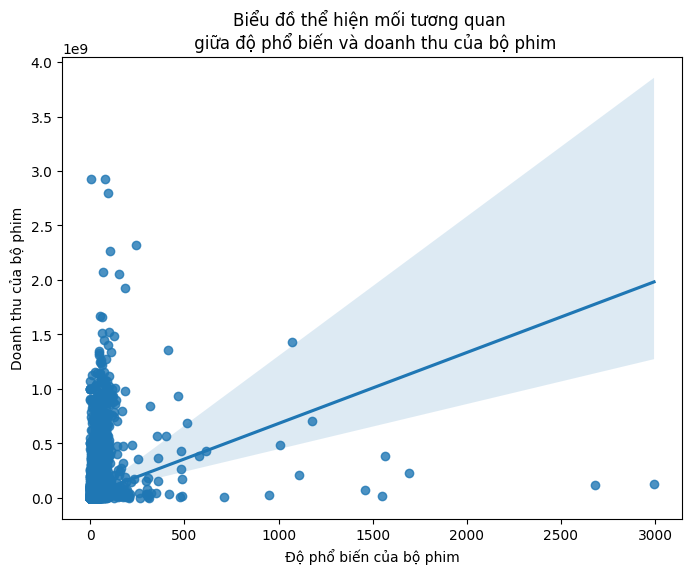

In [50]:
df_filtered = df.loc[(df["popularity"] > 0) & (df["revenue"] > 0)]

plt.figure(figsize=(8, 6))
sns.regplot(x="popularity", y="revenue", data=df_filtered)
plt.title("Biểu đồ thể hiện mối tương quan \n giữa độ phổ biến và doanh thu của bộ phim")
plt.xlabel("Độ phổ biến của bộ phim")
plt.ylabel("Doanh thu của bộ phim")
plt.show()

In [51]:
correlation = df_filtered["revenue"].corr(df_filtered["popularity"])
correlation

0.24613151132194822

# **3.5. Phân tích dữ liệu đa biến**

## **Tương quan giữa các biến điểm đánh giá trung bình, số lượng phiếu bình chọn, thời lượng, độ phổ biến, kinh phí sản xuất và doanh thu của bộ phim**

In [52]:
columns = ["vote_average", "vote_count", "runtime", "popularity", "budget", "revenue"]
df_filtered = df[(df[columns] > 0).all(axis=1)]

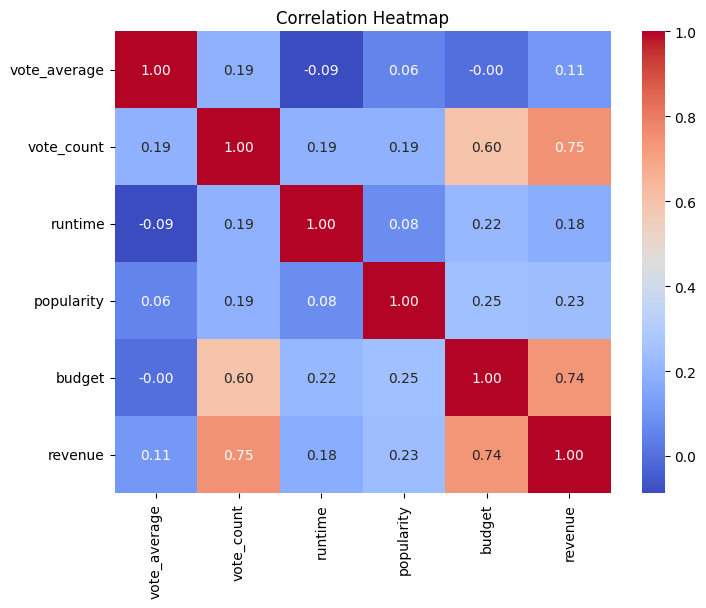

In [53]:
correlation_matrix = df_filtered[columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## **Trong thế kỉ 21, thể loại phim được đánh giá có độ nổi tiếng trung bình cao nhất qua mỗi năm là thể loại nào?**

In [54]:
genres = df["genres"].apply(lambda x: re.split(", |,", str(x)))
genres = genres.apply(lambda x: [] if str(x) == "['nan']" else x)
popularity_by_year_genres = pd.DataFrame({
    "release_year": release_date.dt.year,
    "genres": genres,
    "popularity": df["popularity"],
})

popularity_by_year_genres = popularity_by_year_genres.explode("genres")\
                              .groupby(["release_year", "genres"])["popularity"].mean()\
                              .reset_index()

popularity_since_2001 = popularity_by_year_genres.loc[(popularity_by_year_genres["release_year"] > 2000) &
                                                      (popularity_by_year_genres["release_year"] <= 2024)]

max_popularity_idx = popularity_since_2001.groupby("release_year")["popularity"].idxmax()
max_popularity_genres = popularity_since_2001.loc[max_popularity_idx].reset_index(drop=True)
max_popularity_genres

,release_year,genres,popularity
0,2001.0,Adventure,7.595033
1,2002.0,Adventure,7.691592
2,2003.0,Adventure,6.925613
3,2004.0,Adventure,8.161229
4,2005.0,Adventure,7.758276
5,2006.0,Adventure,6.338628
6,2007.0,Fantasy,6.320694
7,2008.0,Adventure,6.693723
8,2009.0,Adventure,6.556258
9,2010.0,Adventure,7.143484


## **Trong thế kỉ 21, thể loại phim được đánh giá có doanh thu trung bình cao nhất qua mỗi năm là thể loại nào?**

In [55]:
genres = df["genres"].apply(lambda x: re.split(", |,", str(x)))
genres = genres.apply(lambda x: [] if str(x) == "['nan']" else x)
revenue_by_year_genres = pd.DataFrame({
    "release_year": release_date.dt.year,
    "genres": genres,
    "revenue": df["revenue"],
})

revenue_by_year_genres = revenue_by_year_genres.explode("genres")\
                              .groupby(["release_year", "genres"])["revenue"].mean()\
                              .reset_index()

revenue_since_2001 = revenue_by_year_genres.loc[(revenue_by_year_genres["release_year"] > 2000) &
                                                (revenue_by_year_genres["release_year"] <= 2024)]

max_revenue_idx = revenue_since_2001.groupby("release_year")["revenue"].idxmax()
max_revenue_genres = revenue_since_2001.loc[max_revenue_idx].reset_index(drop=True)
max_revenue_genres

,release_year,genres,revenue
0,2001.0,Adventure,2.753865e+07
1,2002.0,Adventure,3.134291e+07
2,2003.0,Adventure,2.962736e+07
3,2004.0,Adventure,3.281450e+07
4,2005.0,Adventure,2.831667e+07
5,2006.0,Adventure,2.340907e+07
6,2007.0,Adventure,2.667361e+07
7,2008.0,Adventure,2.372283e+07
8,2009.0,Adventure,3.090479e+07
9,2010.0,Adventure,3.272571e+07
